# Demographic Analysis of Crime Victims
This notebook investigates how crime affects different age groups, genders, and ethnicities.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick   

## 1. Load Processed Data
We work with the cleaned dataset from the EDA notebook.


In [46]:
# Save directory for images
save_path = '../visuals/demographics/'

# Load DataFrame from the Parquet file saved in the previous notebook
df = pd.read_parquet('../data/processed/df.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  int64         
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
 12  Year Occ      185715 non-null  int32         
 13  Month Occ     185715 non-null  int32         
 14  Weekday Occ   185715 non-null  object        
 15  Hour Occ      185

In [47]:
plt.style.use('seaborn-v0_8-whitegrid')
custom_palette = sns.color_palette("viridis", 10)
sns.set_palette(custom_palette)

## 2. Age Distribution of Victims


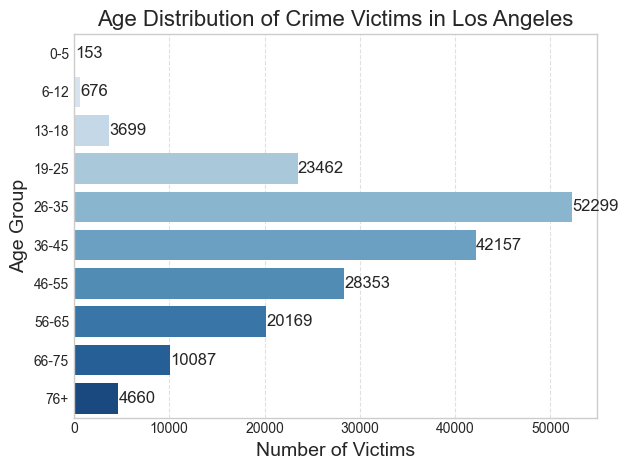

In [48]:
df_age = df[df['Vict Age'] < 100].copy()
age_bins = [0, 5, 12, 18, 25, 35, 45, 55, 65, 75, 100]
age_labels = ['0-5', '6-12', '13-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']
df_age['Age Group'] = pd.cut(df_age['Vict Age'], bins=age_bins, labels=age_labels, right=False)

age_counts = df_age['Age Group'].value_counts().sort_index()

sns.barplot(
    x=age_counts.values, 
    y=age_counts.index, 
    palette="Blues",
    hue=age_counts.index
)

for index, value in enumerate(age_counts.values):
    plt.text(value + 2, index, f'{value}', va='center', fontsize=12)

plt.xlabel('Number of Victims', fontdict={'fontsize': 14})
plt.ylabel('Age Group', fontdict={'fontsize': 14})
plt.title('Age Distribution of Crime Victims in Los Angeles', fontdict={'fontsize': 16})

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig(save_path + 'victim_age_distribution.png')
plt.show()


## 3. Crime by Gender


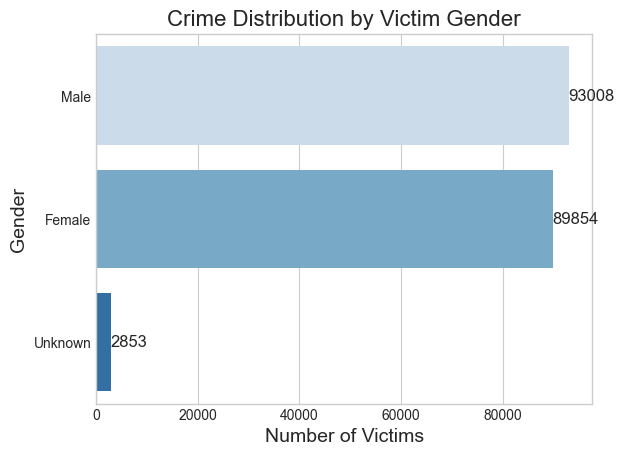

<Figure size 1200x800 with 0 Axes>

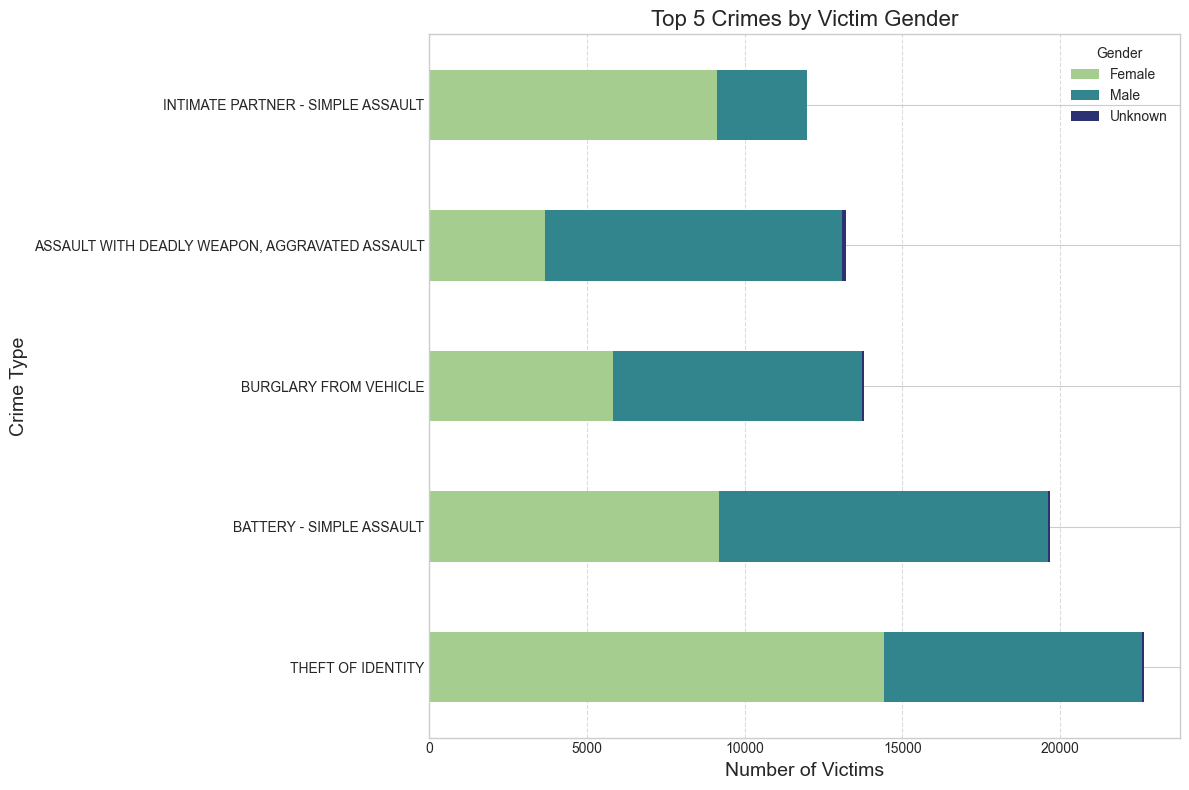

In [49]:
# Create a copy of the dataframe to work with gender data
df_gender = df.copy()
df_gender['Vict Sex'] = df_gender['Vict Sex'].fillna('X') 

# Map codes to more descriptive names
gender_map = {
    'F': 'Female', 
    'M': 'Male', 
    'X': 'Unknown',
    'H': 'Unknown'  
}
df_gender['Gender'] = df_gender['Vict Sex'].map(gender_map)

# Count of crimes by gender
gender_counts = df_gender['Gender'].value_counts()

sns.barplot(
    x=gender_counts.values, 
    y=gender_counts.index, 
    palette="Blues",
    hue=gender_counts.index
)

# Add labels to the bars
for index, value in enumerate(gender_counts.values):
    plt.text(value + 2, index, f'{value}', va='center', fontsize=12)

plt.xlabel('Number of Victims', fontdict={'fontsize': 14})
plt.ylabel('Gender', fontdict={'fontsize': 14})
plt.title('Crime Distribution by Victim Gender', fontdict={'fontsize': 16})

plt.savefig(save_path + 'crime_by_gender_bar.png')
plt.show()

# Top 5 crimes by gender
top_crimes_by_gender = pd.crosstab(df_gender['Crm Cd Desc'], df_gender['Gender'])
top_crimes_by_gender['Total'] = top_crimes_by_gender.sum(axis=1)
top_crimes_by_gender = top_crimes_by_gender.sort_values('Total', ascending=False).head(5)
top_crimes_by_gender = top_crimes_by_gender.drop('Total', axis=1)

plt.figure(figsize=(12, 8))
top_crimes_by_gender.plot(
    kind='barh', stacked=True, figsize=(12, 8), colormap='crest'
)

plt.title('Top 5 Crimes by Victim Gender', fontdict={'fontsize': 16})
plt.ylabel('Crime Type', fontdict={'fontsize': 14})
plt.xlabel('Number of Victims', fontdict={'fontsize': 14})
plt.legend(title='Gender', loc='upper right')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig(save_path + 'top_5_crimes_by_gender.png')
plt.show()

## 4. Crime by Ethnicity
We analyze how crime affects different ethnic groups.


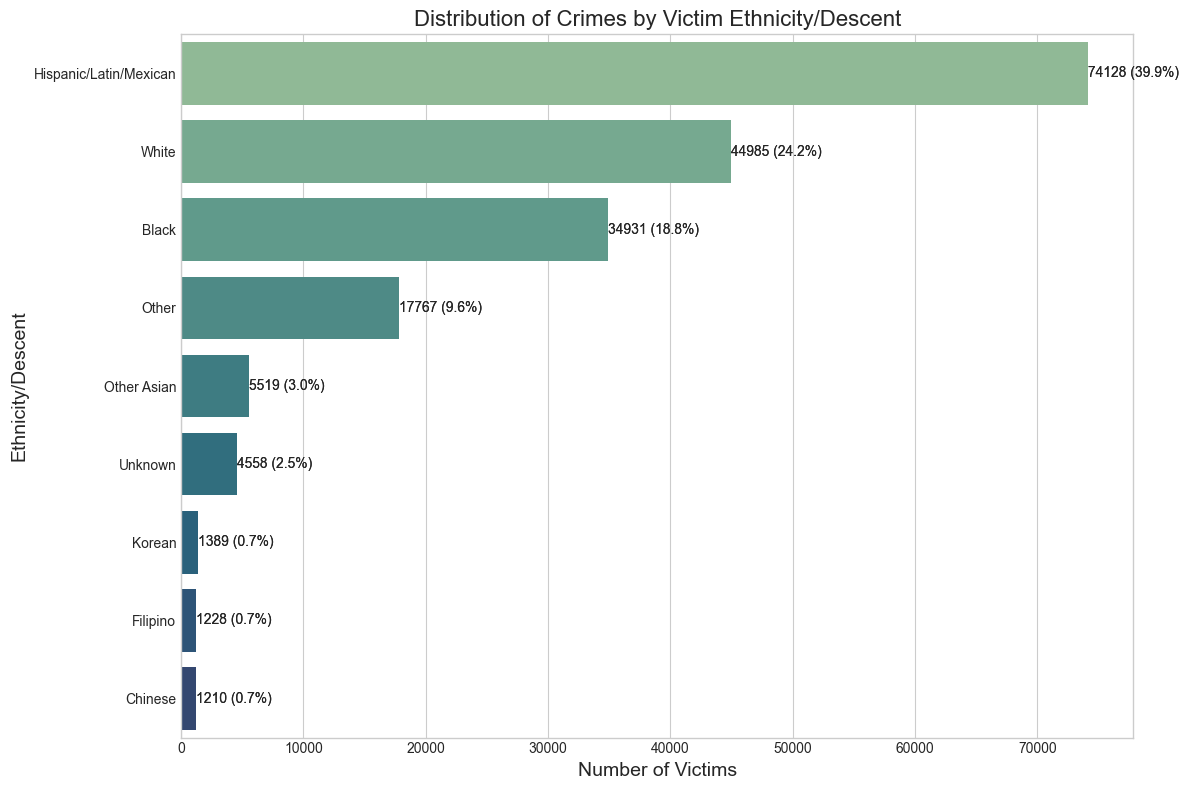

In [51]:
# Clean and prepare descent data
df_ethnicity = df.copy()
df_ethnicity['Vict Descent'] = df_ethnicity['Vict Descent'].fillna('X') 

descent_map = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
df_ethnicity['Ethnicity'] = df_ethnicity['Vict Descent'].map(descent_map)
df_ethnicity['Ethnicity'] = df_ethnicity['Ethnicity'].fillna('Other')  

# Group less frequent ethnicities
ethnicity_counts = df_ethnicity['Ethnicity'].value_counts()
threshold = len(df_ethnicity) * 0.005 
minor_ethnicities = ethnicity_counts[ethnicity_counts < threshold].index
df_ethnicity['Ethnicity'] = df_ethnicity['Ethnicity'].apply(
    lambda x: 'Other' if x in minor_ethnicities else x)

# Count of crimes by ethnicity after grouping
ethnicity_counts_grouped = df_ethnicity['Ethnicity'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(
        y=ethnicity_counts_grouped.index, 
        x=ethnicity_counts_grouped.values, 
        palette=sns.color_palette("crest", len(ethnicity_counts_grouped)),
        hue=ethnicity_counts_grouped.index
    )
plt.title('Distribution of Crimes by Victim Ethnicity/Descent', fontsize=16)
plt.xlabel('Number of Victims', fontsize=14)
plt.ylabel('Ethnicity/Descent', fontsize=14)

# Add percentages at the end of the bars
total = ethnicity_counts_grouped.sum()
for i, v in enumerate(ethnicity_counts_grouped.values):
    ax.text(v + 0.1, i, f"{v} ({v/total:.1%})", va='center')
total = ethnicity_counts_grouped.sum()
for i, v in enumerate(ethnicity_counts_grouped.values):
    ax.text(v + 0.1, i, f"{v} ({v/total:.1%})", va='center')

plt.tight_layout()
plt.savefig(save_path + 'crime_by_ethnicity.png')
